# Report

In [1]:
from IPython.display import Image, display
import os

figures_dir = "features"

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from titanic import data, plot_utils, modelling
from titanic.plot_utils import plot_categorical_survival

In [3]:
TRAIN_PATH = "data/train.csv"
TEST_PATH = "data/test.csv"
N_JOBS=-1
RANDOM_STATE=42
CRITERION="gini"
N_ESTIMATORS=100

In [4]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

all_df = data.concatenator(train_df, test_df)

## Existing Visualisations

The existing visualisation consist of only two types of graph:

- count plots for categorical variables

- distribution plots for numerical variables

These plots are fairly homogeneous, and are probably intended more for *exploratory* rather than *explanatory* data analysis.

This allows us to compare the number of people in each group that fall into a category, or compare distributions between groups. For example:

### Countplot

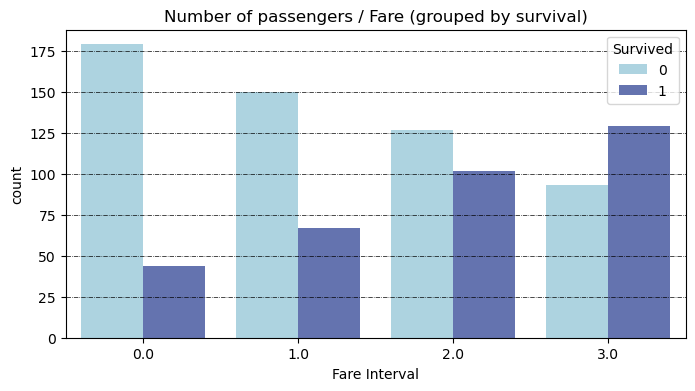

In [5]:
fig_path = os.path.join(figures_dir, "Fare Interval_countplot.png")
display(Image(filename=fig_path))

These graphs are useful for comparing how survivorship differs between passengers paying different fares; however, it has a few issues:

- 'Fare Interval' is not explained. This is a feature that we calculated by putting fares into bins. We should include the bin limits rather than the somewhat meaningless index that we currently see.

- We likely want to emphasise here that those paying higher fares have a greater chance of survival. It amy be useful to present percentages rather than counts.

### Distribution Plot

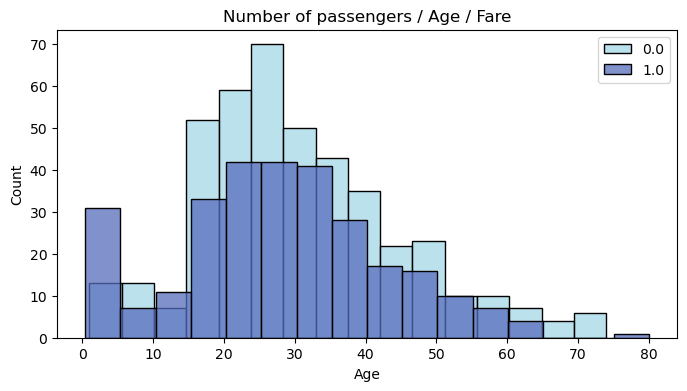

In [6]:
fig_path = os.path.join(figures_dir, "Age_distribution.png")
display(Image(filename=fig_path))

This plot is slightly strange. In principle this kind of plot can be useful, but this one in particular is poor:

- The bins on both plots are not aligned. We should either align the bins (e.g. into 5 year intervals) or use a KDE plot rather than a histogram.

- The group key is poorly chosen, and poorly explained. What do 0.0 and 1.0 mean?

As a side-note, I also do not understand why we have created a new categorical feature from the fare. The dataset already has a variable to indicate ticket class, which is likely highly collinear with our new 'fare interval' variable. This is something that we can test if we are adamant on keeping this feature.

### Visualising the testing dataset...

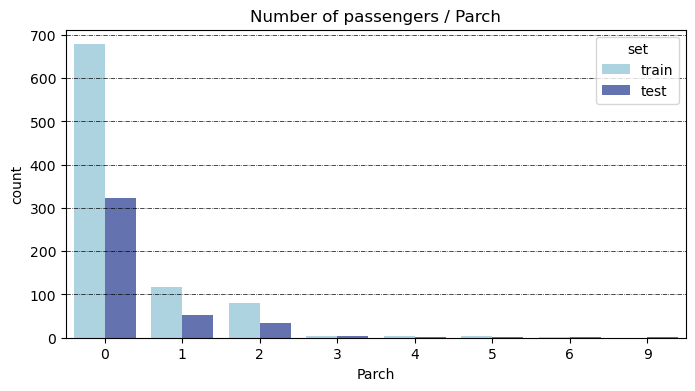

In [7]:
fig_path = os.path.join(figures_dir, "Parch_countplot.png")
display(Image(filename=fig_path))

As a rule of thumb, we should also avoid looking at the testing dataset until after we have trained the model. The fact that our exploratory data analysis step compares the testing and training datasets could introduce a bias in our methodology before we reach the modelling stage. 

I would say the same thing about the 'age interval' feature that we compute from the data.

## Explanatory Data Analysis

The existing graphs are not suitable for explanatory data analysis. The `plot_utils.py` function allow us to mass produce plots so that we (the researcher) can quickly get to know the data. Although, as I have already mentioned, there are still flaws in how the exploratory data analysis has been conducted.

Here are some examples of visualisations that are better suited for showing to an audience:

### Survival by a Categorical Variable

Saved figure to features/vis1.png


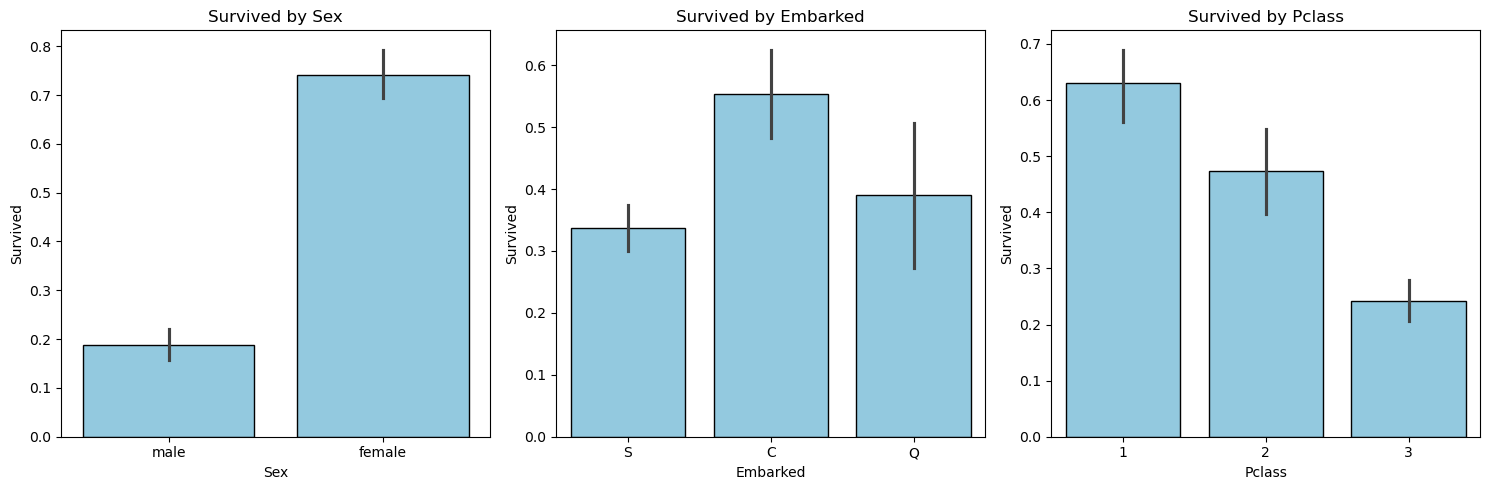

In [7]:
categorical_cols = ['Sex', 'Embarked', 'Pclass']
plot_categorical_survival(train_df, categorical_cols)

Women had a greater survival rate than men. This makes sense if we consider that they were likely given priority during evacuations.

Where a person embarked from does not seem like it should have an effect on survival (at least in my mind), so this observed relationship may not be causal.

Finally, higher class passengers had greater survival rates. This could be because they have rooms closer to the top deck of the ship. This would make evacuation easier. If lower class passengers were deeper in the ship then it would be harder for them to reach safety.

### Survival by a Continuous Variable (e.g. Age)

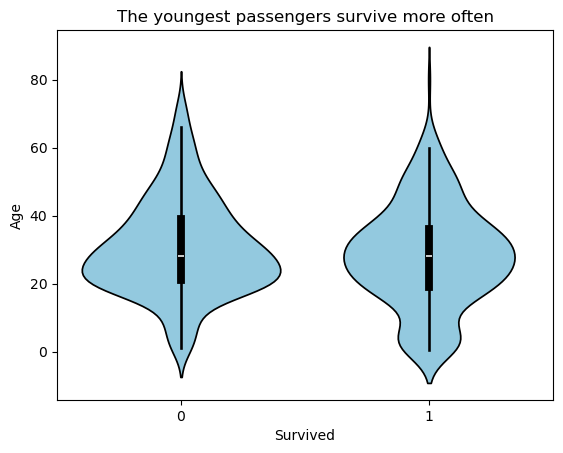

In [10]:
sns.violinplot(data=train_df, x='Survived', y='Age', color="skyblue", edgecolor="black")
plt.title("The youngest passengers survive more often")
plt.show()

We can observe that the youngest passengers had higher survival rates. This is likely because they were given priority during evacuation.

For all others, the age distribution is largely the same.

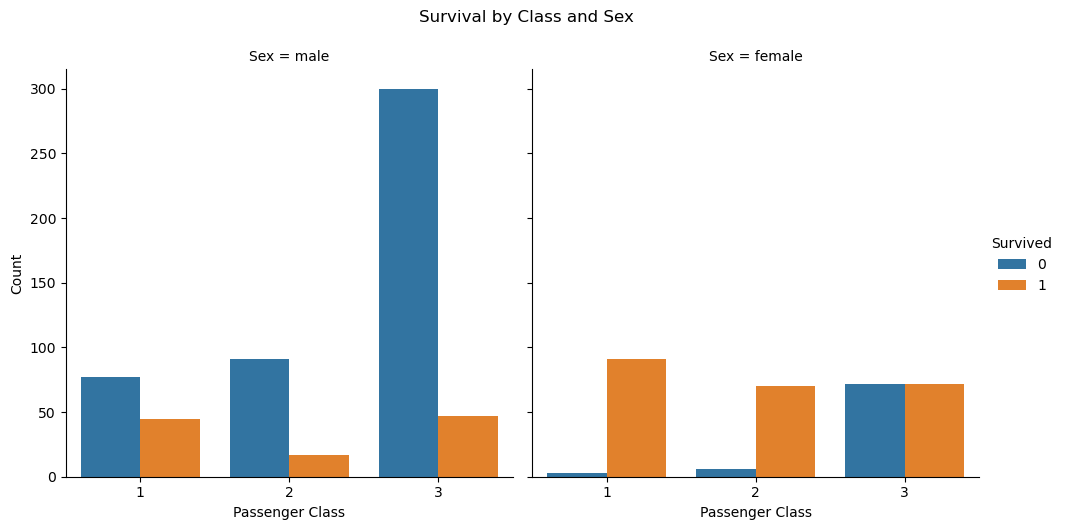

In [13]:
g = sns.catplot(data=train_df, x="Pclass", hue="Survived",
                col="Sex", kind="count")
g.set_axis_labels("Passenger Class", "Count")
g.fig.suptitle("Survival by Class and Sex", y=1.05)
plt.show()

We observe that the majority group of non-survivors are males with 3rd class tickets. We also observe again the pattern showing that males would more often die than survive.

Compare this to females. Females in 1st class would almost certainly survive. There is also heightened survival for 2nd class female passengers. If a female was in 3rd class, they would be more likely to die, but they still fared vastly better than males (ceteris paribus).

## Conclusions

These new graphs are not perfect, but they are an improvement over the old set of graphs. They include clear titles and legends, and they are aimed at uncovering a specific story in the dataset.

From this new set of graphs it becomes more apparent which features are important:

- Sex
- Age
- Passenger Class

And we learned that the port where a person embarked is less likely to be important (or at least not causal in determining a person's survival).